In [289]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [290]:
# create dataframe
df = pd.read_csv("data/spam-data.csv")

In [291]:
df = df.dropna()
print(df.shape)
print(df.columns)

(4601, 58)
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_co

In [292]:
df.sample(n=5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
3757,0.00,0.29,0.29,0.0,0.29,0.00,0.00,0.29,0.00,0.00,...,0.037,0.113,0.000,0.000,0.037,0.000,1.531,7,147,0
1153,0.74,0.74,0.74,0.0,0.00,0.00,0.37,0.00,0.37,1.12,...,0.000,0.000,0.061,0.061,0.122,0.000,4.727,57,208,1
1957,0.00,0.00,0.48,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.353,7,88,0
2640,0.00,0.39,0.19,0.0,0.19,0.09,0.00,0.00,0.00,0.00,...,1.352,0.080,0.000,0.016,0.000,0.000,1.679,17,178,0
1611,0.77,0.38,0.77,0.0,0.00,0.57,0.00,0.57,1.15,1.15,...,0.027,0.027,0.000,0.438,0.191,0.054,14.619,525,921,1


In [293]:
# setup split test

# first split
X = df.drop(columns=["spam"])
y = df["spam"]


# second split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

print(f"y value counts: {y.value_counts()}")
print(f"y_train value counts: {Y_train.value_counts()}")
print(f"y_test value counts: {Y_test.value_counts()}")

y value counts: spam
0    2788
1    1813
Name: count, dtype: int64
y_train value counts: spam
0    2112
1    1338
Name: count, dtype: int64
y_test value counts: spam
0    676
1    475
Name: count, dtype: int64


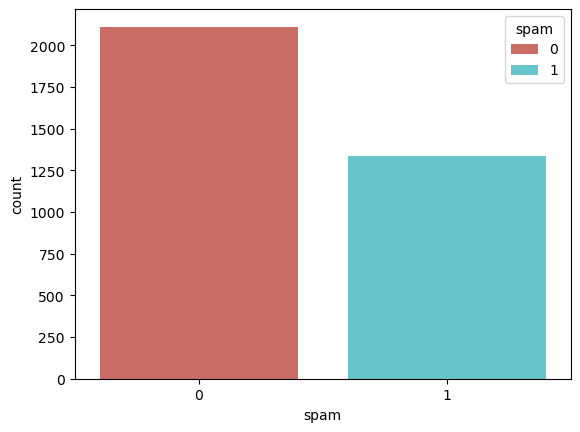

In [294]:
# extra layer of validation
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=Y_train, data=df, hue=Y_train, palette="hls")
plt.show()

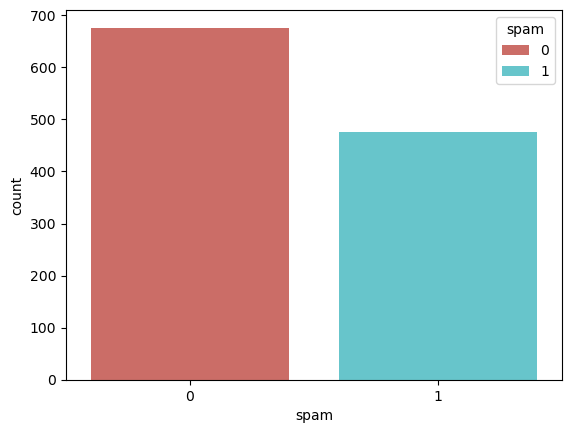

In [295]:
sns.countplot(x=Y_test, data=df, hue=Y_test, palette="hls")
plt.show()

In [296]:
# plot validation
cns_tr, cs_tr = Y_train.value_counts()

no_spam_sample_size = cns_tr / (cns_tr + cs_tr)
spam_sample_size = cs_tr / (cns_tr + cs_tr)

print(f"no_spam_sample_size: {no_spam_sample_size}")
print(f"spam_sample_size: {spam_sample_size}")

no_spam_sample_size: 0.6121739130434782
spam_sample_size: 0.38782608695652177


In [297]:
# plot validation
cns_te, cs_te = Y_test.value_counts()

no_spam_sample_size = cns_te / (cns_te + cs_te)
spam_sample_size = cs_te / (cns_te + cs_te)

print(f"no_spam_sample_size: {no_spam_sample_size}")
print(f"spam_sample_size: {spam_sample_size}")

no_spam_sample_size: 0.5873153779322329
spam_sample_size: 0.4126846220677672


In [298]:
# initiate scaler
scaler = StandardScaler().set_output(transform="pandas")

# scale features
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [299]:
# initiate logistical regression
logreg = LogisticRegression(random_state=1)

# fit
logreg.fit(X_train_scl, Y_train)

# predict
y_predict = logreg.predict(X_test_scl)

# accuracy
acc_score = accuracy_score(Y_test, y_predict)
print(acc_score)

0.9226759339704604


In [300]:
# validate score
values_scores = cross_val_score(logreg, X_train_scl, Y_train, scoring="accuracy")
print(f"values_scores: {values_scores}")
print(f"values_scores mean: {values_scores.mean()}")

values_scores: [0.92463768 0.90869565 0.92318841 0.93623188 0.92463768]
values_scores mean: 0.9234782608695653


In [301]:
# initiate random forest classifier
rand_clf = RandomForestClassifier(random_state=1)

# fit classifier
rand_clf.fit(X_train_scl, Y_train)

# predict
clf_predict = rand_clf.predict(X_test_scl)

In [302]:
# check accuracy
rand_clf_score = accuracy_score(Y_test, clf_predict)
print(rand_clf_score)

0.9582971329278888


In [303]:
# validate accuracy
rand_clf_value_score = cross_val_score(
    rand_clf, X_train_scl, Y_train, scoring="accuracy"
)
print(f"rand_clf_value_score: {rand_clf_value_score}")
print(f"rand_clf_value_score mean: {rand_clf_value_score.mean()}")

rand_clf_value_score: [0.95507246 0.93478261 0.94057971 0.95797101 0.96086957]
rand_clf_value_score mean: 0.9498550724637681


## Evaluation

### 1. Which model performed better?

Based on the accuracy scores, the Random Forest model performed better than the Logistic Regression model. The average accuracy from cross-validation for the Random Forest model was approximately 0.9499 (94.99%), while the Logistic Regression model achieved an average accuracy of 0.9235 (92.35%). This indicates that the Random Forest model has slightly higher accuracy and, therefore, performs better on this task.

### 2. How does that compare to your prediction?

If the initial prediction was that Random Forest would outperform Logistic Regression (due to its ability to capture complex patterns and interactions within the data), then the results confirm this prediction. Random Forest’s ensemble approach generally makes it more powerful for classification tasks, which aligns with the observed performance difference. However, if the prediction was the opposite (expecting Logistic Regression to perform better), then the results do not align with the prediction.
